This data set consists of the marks secured by the students in various subjects.

I am set to examine:

How effective is the test preparation course?
Which major factors contribute to test outcomes?

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
import dateutil.parser
import re

#set juyter to display up to 30 columns, so it can fit well on the screen
pd.set_option('display.max_columns', 50)
pd.set_option('expand_frame_repr', True)


sns.set_palette('hls')
#show figures in notebook
%matplotlib inline

In [2]:
exam_score = pd.read_csv('exams.csv')

In [3]:
exam_score.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,male,group A,high school,standard,completed,67,67,63
1,female,group D,some high school,free/reduced,none,40,59,55
2,male,group E,some college,free/reduced,none,59,60,50
3,male,group B,high school,standard,none,77,78,68
4,male,group E,associate's degree,standard,completed,78,73,68


In [4]:
def missing_num(x):
    return sum(x.isnull())

print('Missing values per column')
#applying our function by column
#check sum of missing values by column and get the columns where the sum is not zero

print(exam_score.apply(missing_num, axis = 0).where(lambda x: x!=0).dropna())

Missing values per column
Series([], dtype: float64)


In [6]:
exam_score.describe()

,math score,reading score,writing score
count,1000.000000,1000.000000,1000.000000
mean,66.396000,69.002000,67.738000
std,15.402871,14.737272,15.600985
min,13.000000,27.000000,23.000000
25%,56.000000,60.000000,58.000000
50%,66.500000,70.000000,68.000000
75%,77.000000,79.000000,79.000000
max,100.000000,100.000000,100.000000


In [7]:
exam_score.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [64]:
columns = ['math score', 'reading score', 'writing score','test preparation course']
prepared = exam_score[columns]

In [15]:
prepared.head()

,math score,reading score,writing score,test preparation course
0,67,67,63,completed
1,40,59,55,none
2,59,60,50,none
3,77,78,68,none
4,78,73,68,completed


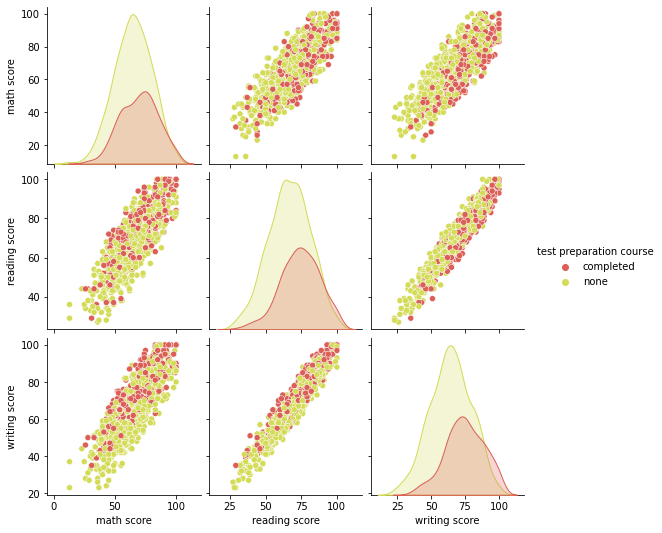

In [16]:
sns.pairplot(prepared, hue = 'test preparation course')

C:\Users\HAFEEZAH SANUSI IGE\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='math score', ylabel='Density'>

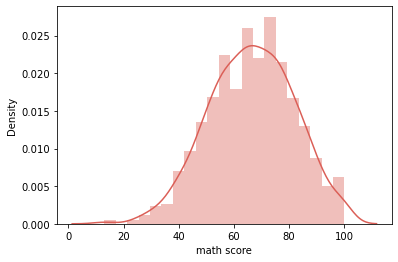

In [32]:
sns.distplot(exam_score['math score'])

C:\Users\HAFEEZAH SANUSI IGE\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='reading score', ylabel='Density'>

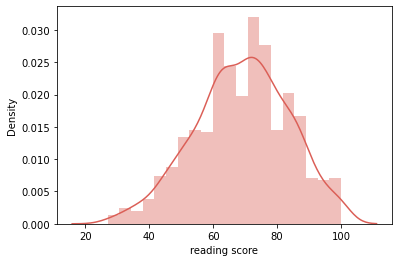

In [34]:
sns.distplot(exam_score['reading score'])

C:\Users\HAFEEZAH SANUSI IGE\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='writing score', ylabel='Density'>

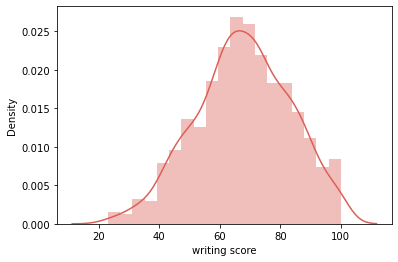

In [35]:
sns.distplot(exam_score['writing score']) 

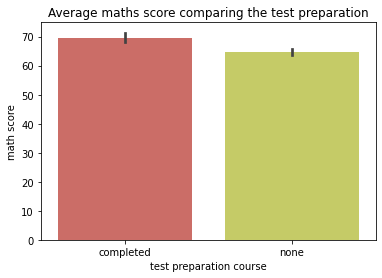

In [43]:
scores= sns.barplot(x = 'test preparation course', y = 'math score', data = exam_score, estimator = np.mean);
scores.set(title = 'Average maths score comparing the test preparation');
scores.set_xticklabels(scores.get_xticklabels(), rotation = 0);

<AxesSubplot:>

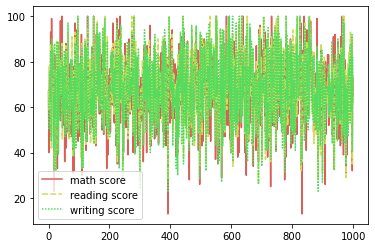

In [56]:
sns.lineplot(data = exam_score)

<AxesSubplot:>

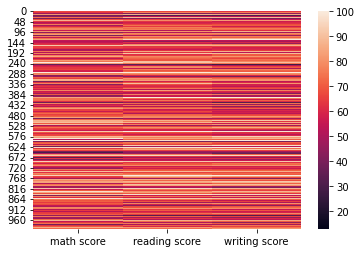

In [65]:
columns = ['math score', 'reading score', 'writing score']
all_scores = exam_score[columns]

sns.heatmap(data= all_scores)

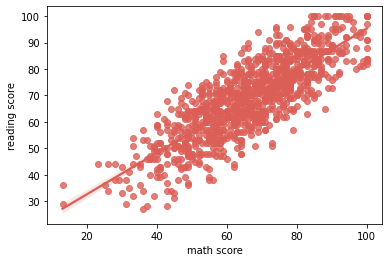

In [51]:
math_read= sns.regplot(x = 'math score', y = 'reading score', data=exam_score)

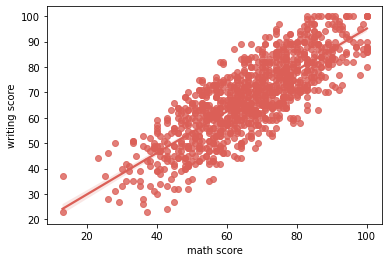

In [52]:
math_write= sns.regplot(x = 'math score', y = 'writing score', data=exam_score)

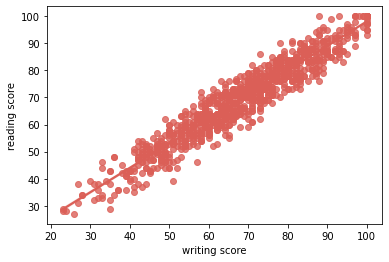

In [54]:
write_read= sns.regplot(x = 'writing score', y = 'reading score', data=exam_score)

In [21]:
column2 = ['math score', 'reading score', 'writing score','parental level of education']
parents = exam_score[column2]

In [44]:
parents.head()

,math score,reading score,writing score,parental level of education
0,67,67,63,high school
1,40,59,55,some high school
2,59,60,50,some college
3,77,78,68,high school
4,78,73,68,associate's degree


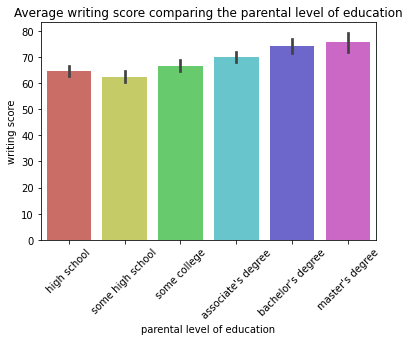

In [50]:
par_edu= sns.barplot(x = 'parental level of education', y = 'writing score', data = exam_score, estimator = np.mean);
par_edu.set(title = 'Average writing score comparing the parental level of education');
par_edu.set_xticklabels(par_edu.get_xticklabels(), rotation = 45);

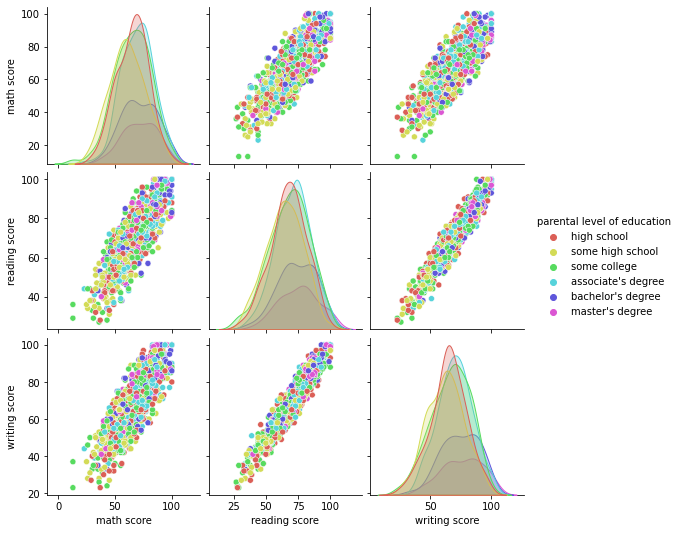

In [24]:
sns.pairplot(parents, hue = 'parental level of education')

In [26]:
column3 = ['math score', 'reading score', 'writing score','race/ethnicity']
ethnicity = exam_score[column3]

In [45]:
ethnicity.head()

,math score,reading score,writing score,race/ethnicity
0,67,67,63,group A
1,40,59,55,group D
2,59,60,50,group E
3,77,78,68,group B
4,78,73,68,group E


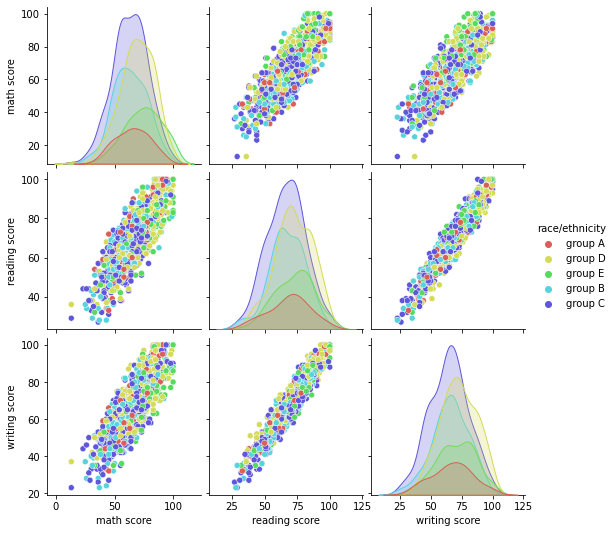

In [28]:
sns.pairplot(ethnicity, hue = 'race/ethnicity')

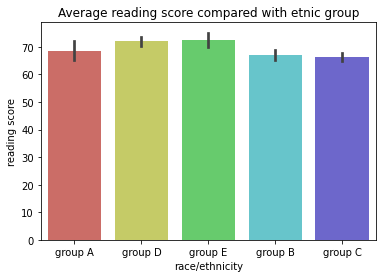

In [47]:
race= sns.barplot(x = 'race/ethnicity', y = 'reading score', data = exam_score, estimator = np.mean);
race.set(title = 'Average reading score compared with etnic group');
race.set_xticklabels(race.get_xticklabels(), rotation = 0);